Data Preparation for AI Approach Notebook

In [1]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
from six.moves import urllib

"""
Data Set Information:

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of 
probability of default among six data mining methods. From the perspective of risk management, the result of 
predictive accuracy of the estimated probability of default will be more valuable than the binary result of 
classification - credible or not credible clients. Because the real probability of default is unknown, this study 
presented the novel â€œSorting Smoothing Methodâ€ to estimate the real probability of default. With the real 
probability of default as the response variable (Y), and the predictive probability of default as the independent 
variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by 
artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to 
zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural 
network is the only one that can accurately estimate the real probability of default.


Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. 
This study reviewed the literature and used the following 23 variables as explanatory variables: 
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her 
family (supplementary) credit. 
X2: Gender (1 = male; 2 = female). 
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
X4: Marital status (1 = married; 2 = single; 3 = others). 
X5: Age (year). 
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 
"""

DOWNLOAD_ROOT = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/"
CREDIT_PATH = os.path.join("datasets", "credit-default")
CREDIT_URL = DOWNLOAD_ROOT + "default%20of%20credit%20card%20clients.xls"

#CREDIT_URL

def fetch_creditdefault_data(credit_url=CREDIT_URL, credit_path=CREDIT_PATH):
    if not os.path.isdir(credit_path):
        os.makedirs(credit_path)
    file_path = os.path.join(credit_path, "default of credit card clients.xls")
    
    urllib.request.urlretrieve(credit_url, file_path) 
    # The commented code above wont execute in proxy settings. Please download the files from Github
    # https://github.com github.com/RoyMachineLearning/3253-Machine-Learning
    
#fetch_creditdefault_data()

import pandas as pd

def load_CRDEFAULT_data(credit_path=CREDIT_PATH):
    file_path = os.path.join(credit_path, "default of credit card clients.xls")
    return pd.read_excel(file_path, sheet = 0, skiprows= 1, header = 0)

df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls", skiprows= 1, header = 0)
df = df.drop('ID',axis=1)

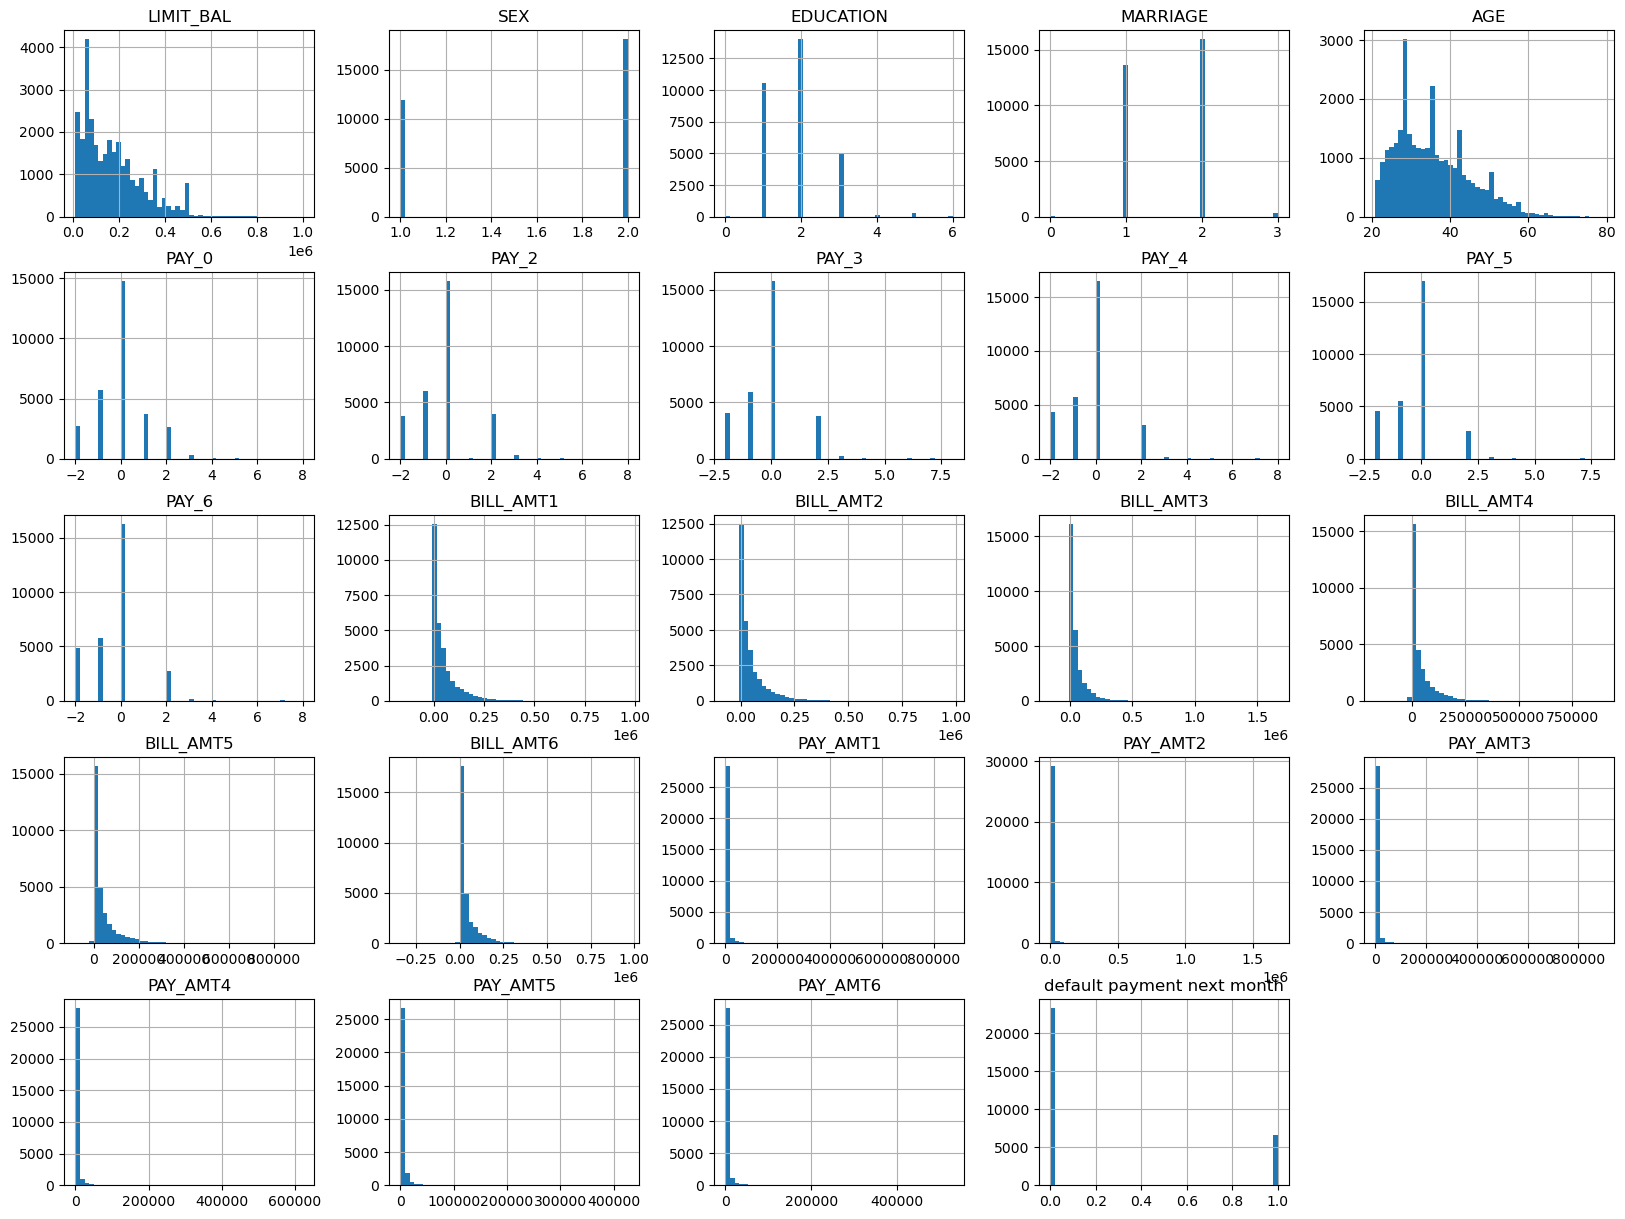

In [3]:
#Part 1 - Explore the data - Credit Cards

import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
TARGET = "default payment next month"
columns_predictors = [col for col in df.columns if col not in [TARGET]]
columns_categorical = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
columns_numerical = [col for col in columns_predictors if col not in columns_categorical]
print(f"TARGET: {TARGET}")
print(f"columns_predictors: {columns_predictors}")
print(f"columns_categorical: {columns_categorical}")
print(f"columns_numerical: {columns_numerical}")

TARGET: default payment next month
columns_predictors: ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
columns_categorical: ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
columns_numerical: ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


**Get the Shape of the Dataset**

In [6]:
X = df[columns_predictors]
y = df[TARGET]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10086, stratify=y) #stratified sampling based on the target
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (22500, 23)
X_test.shape: (7500, 23)
y_train.shape: (22500,)
y_test.shape: (7500,)


In [15]:
type(X_train)

pandas.core.frame.DataFrame

In [7]:
X_train.shape

(22500, 23)

**Look at the first 5 records**

In [8]:
X_train.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
17777,70000,2,3,2,55,0,0,0,0,0,...,6703,7853,7316,7350,1100,1123,1273,407,300,300
11180,190000,2,2,1,45,2,0,0,0,0,...,131132,96083,97453,99426,6800,7000,3585,3700,3754,7900
18833,70000,2,2,2,24,0,0,0,0,0,...,26194,27454,28159,25775,1800,2000,2000,1500,1500,0
19423,150000,2,1,2,31,0,0,0,-1,0,...,6221,4711,6711,6711,6000,3039,9050,2000,0,4000
15759,130000,2,2,2,22,2,2,2,2,0,...,21213,15443,25371,4264,3412,1700,0,15571,4264,1000


**Look at the Datatypes**

In [9]:
#Investigate the missing values
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22500 entries, 17777 to 21190
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  22500 non-null  int64
 1   SEX        22500 non-null  int64
 2   EDUCATION  22500 non-null  int64
 3   MARRIAGE   22500 non-null  int64
 4   AGE        22500 non-null  int64
 5   PAY_0      22500 non-null  int64
 6   PAY_2      22500 non-null  int64
 7   PAY_3      22500 non-null  int64
 8   PAY_4      22500 non-null  int64
 9   PAY_5      22500 non-null  int64
 10  PAY_6      22500 non-null  int64
 11  BILL_AMT1  22500 non-null  int64
 12  BILL_AMT2  22500 non-null  int64
 13  BILL_AMT3  22500 non-null  int64
 14  BILL_AMT4  22500 non-null  int64
 15  BILL_AMT5  22500 non-null  int64
 16  BILL_AMT6  22500 non-null  int64
 17  PAY_AMT1   22500 non-null  int64
 18  PAY_AMT2   22500 non-null  int64
 19  PAY_AMT3   22500 non-null  int64
 20  PAY_AMT4   22500 non-null  int64
 21  PAY_AMT5

**Using Column Transformer and Test Standard Scaler**

In [10]:
#Create numerical pipeline to transform numerical values

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder ,StandardScaler

#Convert the non transformed Dataframe into list.
columns_categorical_list = list(columns_categorical)
columns_numerical_list = list(columns_numerical)

pipeline_categorical = Pipeline([
  ('onehot', OneHotEncoder(drop='first')),
])

pipeline_numerical = Pipeline([
  ('scaler', StandardScaler()),
])

pipeline_full = ColumnTransformer([
  ("categorical", pipeline_categorical, columns_categorical_list),
  ("numerical", pipeline_numerical, columns_numerical_list),
])

In [11]:
pipeline_full.fit(X_train)
X_train_CT = pipeline_full.transform(X_train)
X_test_CT = pipeline_full.transform(X_test)
print(f"X_train transformed.shape: {X_train_CT.shape}")
print(f"X_test transformed.shape: {X_test_CT.shape}")

X_train

X_train transformed.shape: (22500, 82)
X_test transformed.shape: (7500, 82)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
17777,70000,2,3,2,55,0,0,0,0,0,...,6703,7853,7316,7350,1100,1123,1273,407,300,300
11180,190000,2,2,1,45,2,0,0,0,0,...,131132,96083,97453,99426,6800,7000,3585,3700,3754,7900
18833,70000,2,2,2,24,0,0,0,0,0,...,26194,27454,28159,25775,1800,2000,2000,1500,1500,0
19423,150000,2,1,2,31,0,0,0,-1,0,...,6221,4711,6711,6711,6000,3039,9050,2000,0,4000
15759,130000,2,2,2,22,2,2,2,2,0,...,21213,15443,25371,4264,3412,1700,0,15571,4264,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14525,180000,1,2,2,43,0,0,0,0,0,...,171820,160018,164717,151235,7500,5900,6000,7000,7000,5000
21158,180000,1,2,2,39,0,0,0,0,0,...,124553,127096,128992,131660,4500,6000,6100,5500,4900,5500
15008,30000,1,3,1,43,1,3,2,2,2,...,21207,23491,22818,24321,0,0,2645,0,2029,1027
26563,50000,2,3,2,56,0,0,0,0,0,...,50417,48371,15417,16194,1798,2058,1683,600,1017,20698


**Alternative : Using DataFrame Selector and Test Minmax Scaler**

In [12]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(columns_numerical)),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(columns_categorical)),
        ('onehot', OneHotEncoder(drop='first')),
        
    ])


from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),    
    
    ])

In [13]:
X_train_transform = full_pipeline.fit_transform(X_train)
X_test_transform = full_pipeline.transform(X_test)

In [14]:
print(f"X_train transformed.shape: {X_train_transform.shape}")
print(f"X_test transformed.shape: {X_train_transform.shape}")

X_train transformed.shape: (22500, 82)
X_test transformed.shape: (22500, 82)
